In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
# Target Account
target_user = "@SouthwestAir"

# YOUR CODE HERE
tweets = api.user_timeline(target_user)
counter = 0
pos = []
neg = []
neu = []
comp = []
df = pd.DataFrame(
    {}
)
df['Tweets Ago'] = ''
df['Pos'] = ''
df['Neg'] = ''
df['Neu'] = ''
df['Comp'] = ''
for tweet in tweets:
    
    analysis = analyzer.polarity_scores(tweet['text'])
    comp.append(analysis['compound'])
    pos.append(analysis['pos'])
    neg.append(analysis['neg'])
    neu.append(analysis['neu'])
    df.loc[counter,'Tweets Ago'] = counter
    df.loc[counter,'Pos'] = analysis['pos']
    df.loc[counter,'Neg'] = analysis['neg']
    df.loc[counter,'Neu'] = analysis['neu']
    df.loc[counter,'Comp'] = analysis['compound']
    counter = counter + 1


df

,Tweets Ago,Pos,Neg,Neu,Comp
0,0,0,0,1,0
1,1,0.174,0,0.826,0.4215
2,2,0.258,0.148,0.594,0.631
3,3,0.127,0.174,0.699,-0.2714
4,4,0.394,0,0.606,0.8856
5,5,0.343,0,0.657,0.8356
6,6,0.074,0.3,0.626,-0.7993
7,7,0.13,0,0.87,0.4019
8,8,0.427,0,0.573,0.8655
9,9,0.451,0,0.549,0.5093


In [ ]:
# Convert sentiments to DataFrame
# YOUR CODE HERE


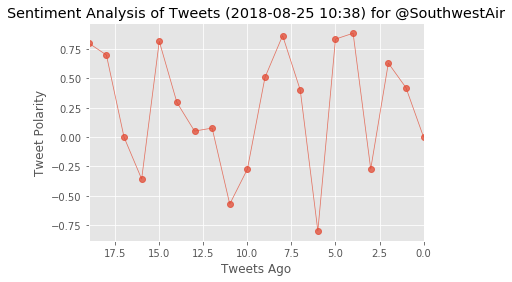

In [13]:
# Create plot
# YOUR CODE HERE
plt.plot(df['Tweets Ago'],df['Comp'], marker = 'o', linewidth = 0.75, alpha = 0.75)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim(max(df['Tweets Ago']) , min(df['Tweets Ago']))
plt.show()
